<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Port_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.59
    Uninstalling yfinance-0.2.59:
      Successfully uninstalled yfinance-0.2.59


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pandas_datareader as pdr
import yfinance as yf
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [3]:
from datetime import datetime
start = datetime(2000,1,1)
end = datetime(2025,5,17)

In [4]:
from os import close
data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()

data1 = yf.download('^GSPC', start, end) # S&P500
data2 = yf.download('^GDAXI',start, end) # DAX
data3 = yf.download('^KS11', start, end) # KOSPI
data4 = yf.download('^N225', start, end) # NIKKEI225
data5 = yf.download('^NSEI', start, end) # NIFTY 50

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
data5.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [6]:
data6 = pd.merge(data1[['Close']], data2[['Close']],left_index=True, right_index=True, how='inner')
data6.columns=['SP500','DAX']

data7 = pd.merge(data3[['Close']], data4[['Close']],left_index=True, right_index=True, how='inner')
data7.columns=['KOSPI','NIKKEI']

data8 = pd.merge(data7, data5['Close'],left_index=True, right_index=True, how='inner')
data8.columns=['KOSPI','NIKKEI','NIFTY']

data = pd.merge(data6, data8,left_index=True, right_index=True, how='inner')

In [7]:
data.head()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2007-09-18,1519.780029,7575.209961,1838.609985,15801.799805,4546.200195
2007-09-19,1529.030029,7750.839844,1902.650024,16381.540039,4732.350098
2007-09-20,1518.750000,7735.089844,1908.969971,16413.789062,4747.549805
2007-09-21,1525.750000,7794.430176,1919.260010,16312.610352,4837.549805
2007-09-27,1531.380005,7853.790039,1945.280029,16832.220703,5000.549805


In [8]:
data.tail()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2025-04-30,5569.060059,22496.980469,2556.610107,36045.378906,24334.199219
2025-05-02,5686.669922,23086.650391,2559.790039,36830.691406,24346.699219
2025-05-07,5631.279785,23115.960938,2573.800049,36779.660156,24414.400391
2025-05-08,5663.939941,23352.689453,2579.479980,36928.628906,24273.800781
2025-05-09,5659.910156,23499.320312,2577.270020,37503.328125,24008.000000


<Axes: xlabel='Date'>

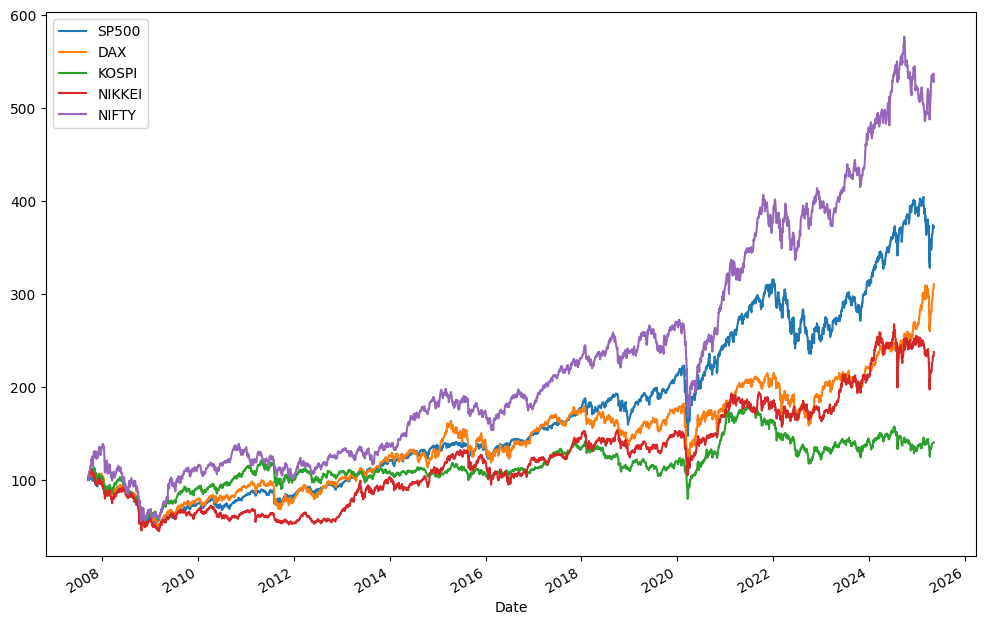

In [9]:
(data / data.iloc[0] * 100).plot(figsize=(12, 8))

In [10]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
Date,,,,,
2007-09-18,NaN,NaN,NaN,NaN,NaN
2007-09-19,0.006068,0.022920,0.034238,0.036031,0.040130
2007-09-20,-0.006746,-0.002034,0.003316,0.001967,0.003207
2007-09-21,0.004598,0.007642,0.005376,-0.006183,0.018780
2007-09-27,0.003683,0.007587,0.013466,0.031356,0.033140


array([[<Axes: title={'center': 'SP500'}>,
        <Axes: title={'center': 'DAX'}>],
       [<Axes: title={'center': 'KOSPI'}>,
        <Axes: title={'center': 'NIKKEI'}>],
       [<Axes: title={'center': 'NIFTY'}>, <Axes: >]], dtype=object)

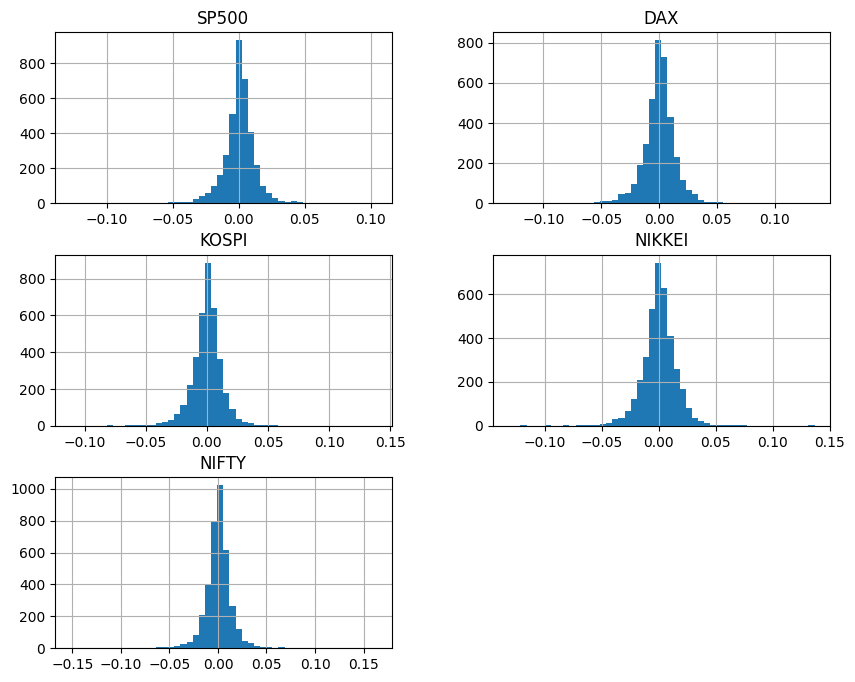

In [11]:
log_returns.hist(bins=50, figsize=(10, 8))

In [12]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'NIFTY']

In [13]:
def print_statistics(array):
    '''  통계치 출력
    인수
    ====
    array : ndarray  통계치를 계산할 자료
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [14]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SP500
------------------------------
     statistic           value
------------------------------
          size      3745.00000
           min        -0.12765
           max         0.10424
          mean         0.00035
           std         0.01373
          skew        -0.54554
      kurtosis        11.96185

Results for symbol DAX
------------------------------
     statistic           value
------------------------------
          size      3745.00000
           min        -0.13055
           max         0.13463
          mean         0.00030
           std         0.01475
          skew        -0.10382
      kurtosis         8.62517

Results for symbol KOSPI
------------------------------
     statistic           value
------------------------------
          size      3745.00000
           min        -0.11172
           max         0.13863
          mean         0.00009
           std         0.01346
          skew        -0.31051
      kurtosis        10.

In [15]:
def normality_tests(arr):
    ''' 주어진 데이타가 정규분포인지 검정
    인수
    ====
    array: ndarray  통계치를 생성할 대상

    '''
    print("Skew of data set  %14.3f" %scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

Text(0, 0.5, 'sample quantiles')

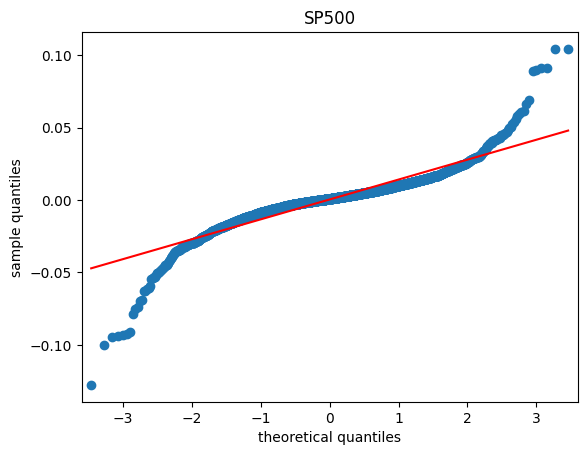

In [16]:
sm.qqplot(log_returns['SP500'].dropna(), line='s')
plt.title('SP500')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

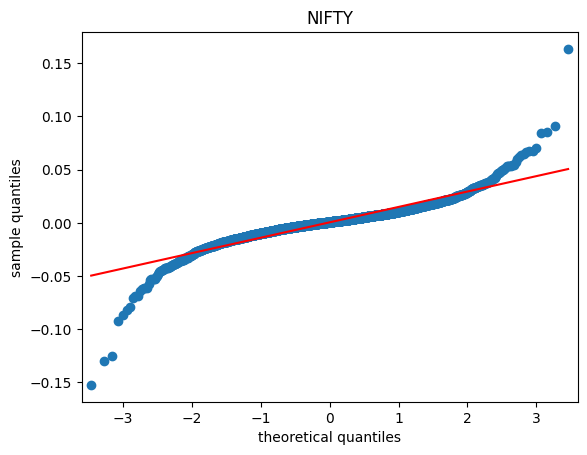

In [17]:
sm.qqplot(log_returns['NIFTY'].dropna(), line='s')
plt.title('NIFTY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [18]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SP500
--------------------------------
Skew of data set          -0.546
Skew test p-value          0.000
Kurt of data set          11.962
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DAX
--------------------------------
Skew of data set          -0.104
Skew test p-value          0.010
Kurt of data set           8.625
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KOSPI
--------------------------------
Skew of data set          -0.311
Skew test p-value          0.000
Kurt of data set          10.698
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol NIKKEI
--------------------------------
Skew of data set          -0.486
Skew test p-value          0.000
Kurt of data set           9.539
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol NIFTY
--------------------------------
Skew of data set          -0.398
Skew test p-v

### Portfolio Optimization

In [19]:
symbols = ['SP500', 'DAX', 'KOSPI', 'NIKKEI', 'NIFTY']
noa = len(symbols)

In [20]:
rets = np.log(data / data.shift(1))

In [21]:
rets.mean() * 252

,0
SP500,0.088475
DAX,0.076178
KOSPI,0.022725
NIKKEI,0.058159
NIFTY,0.111977


In [22]:
rets.std()*np.sqrt(252)

,0
SP500,0.217908
DAX,0.234142
KOSPI,0.213681
NIKKEI,0.258134
NIFTY,0.229499


In [23]:
rets.cov() * 252

,SP500,DAX,KOSPI,NIKKEI,NIFTY
SP500,0.047484,0.032702,0.013820,0.014819,0.017580
DAX,0.032702,0.054822,0.020862,0.025552,0.024429
KOSPI,0.013820,0.020862,0.045660,0.036599,0.024479
NIKKEI,0.014819,0.025552,0.036599,0.066633,0.025700
NIFTY,0.017580,0.024429,0.024479,0.025700,0.052670


In [24]:
rets.corr()

,SP500,DAX,KOSPI,NIKKEI,NIFTY
SP500,1.000000,0.640938,0.296804,0.263444,0.351538
DAX,0.640938,1.000000,0.416979,0.422764,0.454617
KOSPI,0.296804,0.416979,1.000000,0.663532,0.499170
NIKKEI,0.263444,0.422764,0.663532,1.000000,0.433811
NIFTY,0.351538,0.454617,0.499170,0.433811,1.000000


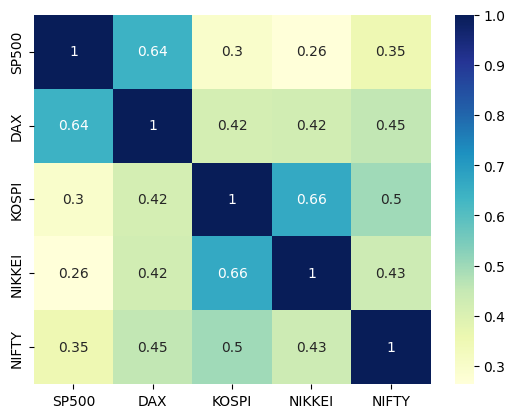

In [25]:
sns.heatmap(rets.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [26]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [27]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [28]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [29]:
prets = []
pvols = []
for p in range (25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

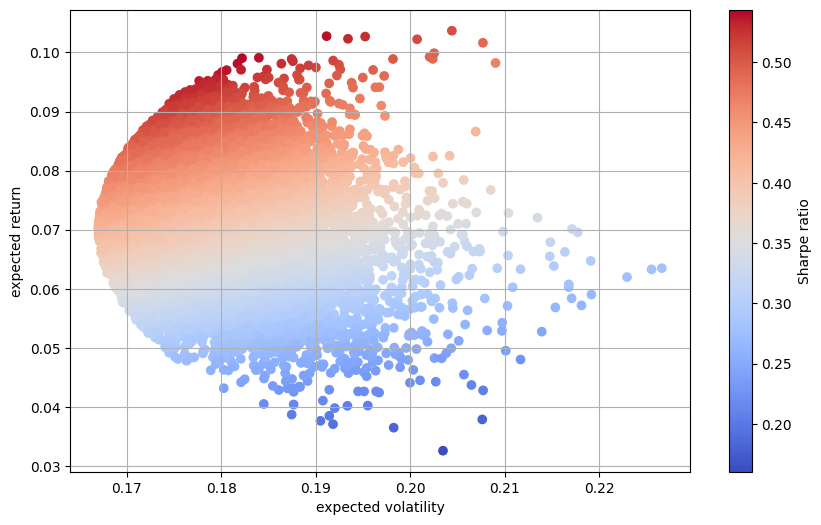

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
pvols = np.array(pvols)

In [31]:
import scipy.optimize as sco

In [32]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [33]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [34]:
bnds = tuple((0, 1) for x in range(noa))

In [35]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [36]:
min_func_sharpe(eweights)

np.float64(-0.41550274009867305)

In [37]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)

CPU times: user 65.1 ms, sys: 0 ns, total: 65.1 ms
Wall time: 69.1 ms


In [38]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5484590837224731
       x: [ 4.172e-01  0.000e+00  8.283e-17  1.084e-17  5.828e-01]
     nit: 6
     jac: [ 6.036e-05  3.169e-02  1.946e-01  2.222e-02 -4.321e-05]
    nfev: 36
    njev: 6

In [39]:
opts['x'].round(3)

array([0.417, 0.   , 0.   , 0.   , 0.583])

In [40]:
port_ret(opts['x']).round(3)

np.float64(0.102)

In [41]:
port_vol(opts['x']).round(3)

np.float64(0.186)

In [42]:
port_ret(opts['x']) / port_vol(opts['x'])

np.float64(0.5484590837224731)

In [43]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [44]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.1669224812515292
       x: [ 3.642e-01  4.856e-02  3.136e-01  6.694e-02  2.067e-01]
     nit: 9
     jac: [ 1.665e-01  1.669e-01  1.671e-01  1.671e-01  1.673e-01]
    nfev: 55
    njev: 9

In [45]:
optv['x'].round(3)

array([0.364, 0.049, 0.314, 0.067, 0.207])

In [46]:
port_ret(optv['x']).round(3)

np.float64(0.07)

In [47]:
port_vol(optv['x']).round(3)

np.float64(0.167)

In [48]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.41989197376863463)

In [49]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [50]:
bnds = tuple((0, 1) for x in weights)

In [52]:
%%time
trets = np.linspace(0.02, 0.1, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.53 s, sys: 16 ms, total: 4.54 s
Wall time: 5.28 s


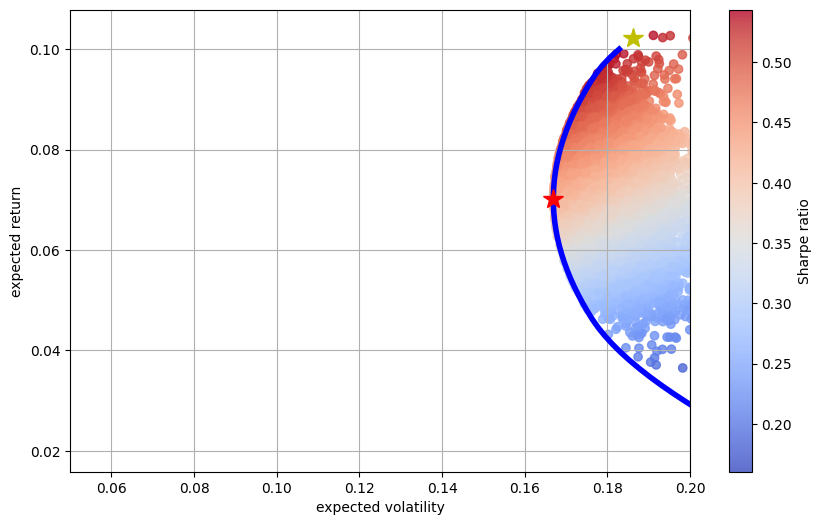

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', alpha=0.8, cmap='coolwarm')  # 무작위 포트폴리오
plt.plot(tvols, trets, 'b', lw=4.0)  # 효율적 투자선
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)   # 최대 샤프지수를 가진 포트폴리오
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)   # 최소 분산 포트폴리오
plt.grid(True)
plt.xlim([0.05, 0.2])
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [54]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [55]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [56]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [57]:
opt_weights ={}
for year in range(2010, 2025):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = sco.minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow.round(4)

In [58]:
opt_weights

{2010: array([0.    , 0.1376, 0.6701, 0.    , 0.1923]),
 2011: array([1., 0., 0., 0., 0.]),
 2012: array([0.    , 0.2188, 0.    , 0.3098, 0.4713]),
 2013: array([0.7641, 0.0282, 0.    , 0.2078, 0.    ]),
 2014: array([0.2469, 0.    , 0.    , 0.    , 0.7531]),
 2015: array([0.    , 0.4045, 0.    , 0.5955, 0.    ]),
 2016: array([0.9381, 0.    , 0.0619, 0.    , 0.    ]),
 2017: array([0.4949, 0.    , 0.1709, 0.    , 0.3342]),
 2018: array([0., 0., 0., 0., 1.]),
 2019: array([0.6429, 0.034 , 0.    , 0.1592, 0.1639]),
 2020: array([0.0606, 0.    , 0.9394, 0.    , 0.    ]),
 2021: array([0.7046, 0.    , 0.    , 0.    , 0.2954]),
 2022: array([0., 0., 0., 0., 1.]),
 2023: array([0.3355, 0.0132, 0.    , 0.1656, 0.4857]),
 2024: array([0.5637, 0.3675, 0.    , 0.    , 0.0688])}